In [1]:
#IMPORTING LIBRARIES
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

In [2]:
NEW_SELECTION = (
    "((Dst_M - D0_M) > 143) & ((Dst_M - D0_M) < 148) & "
    "(K_IPCHI2_OWNPV > 3) & (pi_IPCHI2_OWNPV > 3) & "
    "(K_TRACK_CHI2NDOF < 3.) & (pi_TRACK_CHI2NDOF < 3.) & "
    "(K_PT > 500.) & (pi_PT > 500.) & "
    "(K_hasRich == 1) & (pi_hasRich == 1) & "
    "(mp_TRACK_CHI2NDOF < 3.) & "
    "(mm_TRACK_CHI2NDOF < 3.) & "
    "(mp_isMuon == 1) & (mm_isMuon == 1) & "
    "(mp_PIDmu > 0) & (mm_PIDmu > 0) & "
    "(mp_PT > 250) & (mm_PT > 250) & "
    "(mp_IPCHI2_OWNPV > 3.) & (mm_IPCHI2_OWNPV > 3.) & "
    "(Jpsi_M < 3127) & (Jpsi_M > 3067) & "
    "(Bc_ENDVERTEX_CHI2 < 4.) & "
    "(Bc_IPCHI2_OWNPV < 8.) & "
    "(Bc_DIRA_OWNPV > 0.998) &"
    "(D0_ENDVERTEX_CHI2 < 8.) &"
    "(D0_M > 1835) & (D0_M < 1895) &"
    "(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & "
    "(mm_ProbNNghost < 0.3) & (mp_ProbNNghost < 0.3) & "
    "(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & "
    "(Jpsi_ENDVERTEX_CHI2 < 9.) &"
    "(Dst_ENDVERTEX_CHI2 < 9.) &"
    "(abs(Dst_M - 2010.) < 30.) &"
    "(Dst_PT > 2500.) &"
    "(pi_soft_TRACK_CHI2NDOF < 3.) &"
    "(pi_soft_TRACK_GhostProb < 0.3)"
)


In [3]:
#LOADING DATASET

files_real_data = [
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2011_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2011_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2012_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2012_MagUp.root',
    # '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2015_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2015_MagUp.root',
    # '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2016_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2016_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2017_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2018_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/data/Kpi/2018_MagUp.root',
]
files_simu_data = [

    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2011_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2011_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2012_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2012_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2015_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2015_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2016_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2016_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2017_MagDown.root',
    # '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2017_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2018_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpi/2018_MagUp.root',
]
real_data = uproot.concatenate(files_real_data, cut = NEW_SELECTION, library='pd')
simu_data = uproot.concatenate(files_simu_data, library='pd')

In [4]:
files_simu_data_K3pi = [

    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2011_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2011_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2012_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2012_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2015_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2015_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2016_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2016_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2017_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2017_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2018_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_K3pi/2018_MagUp.root',
]
simu_data_K3pi = uproot.concatenate(files_simu_data_K3pi, library='pd')


In [5]:
files_simu_data_Kpipi0 = [

    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2011_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2011_MagUp.root',
    # '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2012_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2012_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2015_MagDown.root',
    #'/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2015_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2016_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2016_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2017_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2017_MagUp.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2018_MagDown.root',
    '/eos/user/f/facglase/tuples/Bc2JpsiDst/mc/Bc2JpsiDst_Kpipi0/2018_MagUp.root',
]
simu_data_Kpipi0 = uproot.concatenate(files_simu_data_Kpipi0, library='pd')

In [33]:
print(len(simu_data_Kpipi0))
print(len(simu_data_Kpipi0.query(NEW_SELECTION)))
print(len(real_data))

68016
12
1152


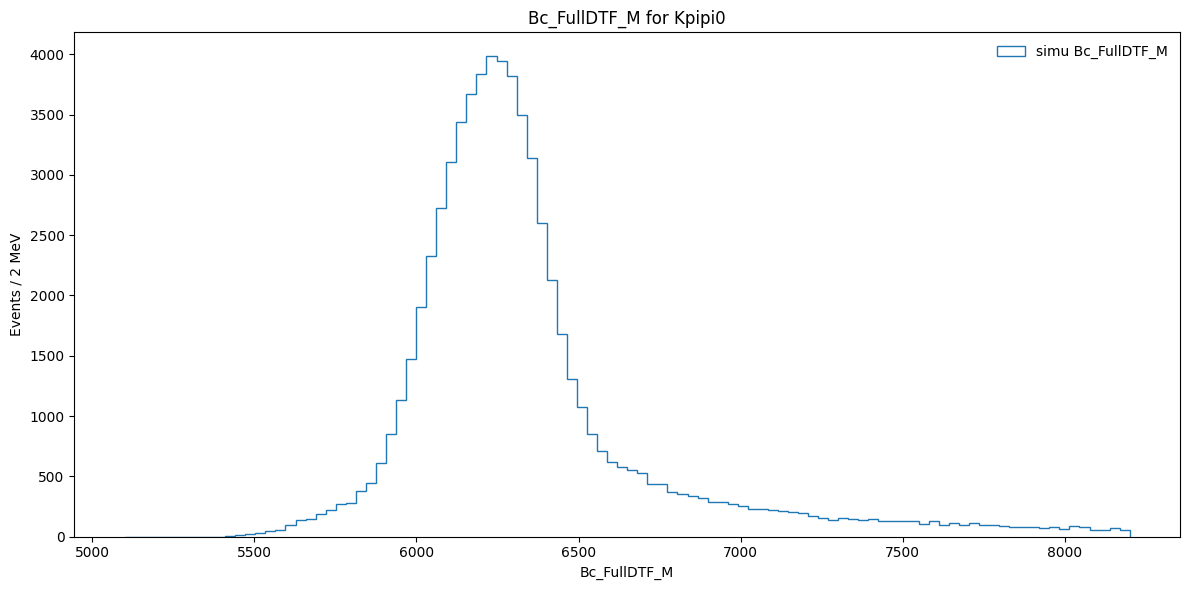

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(simu_data_Kpipi0['Bc_FullDTF_M'], range = (5100, 8200), bins=100, histtype='step', label='simu Bc_FullDTF_M')
# ax.hist(simu_data_K3pi.query(NEW_SELECTION)['Bc_FullDTF_M'], range = (6200, 6400), bins=100, histtype='step', label='real Bc_FullDTF_M with the new selection')
# ax.hist(simu_data_K3pi.query(THE_BIG_SELECTION_original)['Bc_FullDTF_M'], range = (6250,6300), bins=100, histtype='step', label='real Bc_FullDTF_M with the old selection')
ax.set_xlabel('Bc_FullDTF_M')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('Bc_FullDTF_M for Kpipi0')
ax.legend(frameon=False)


plt.tight_layout()
plt.show()

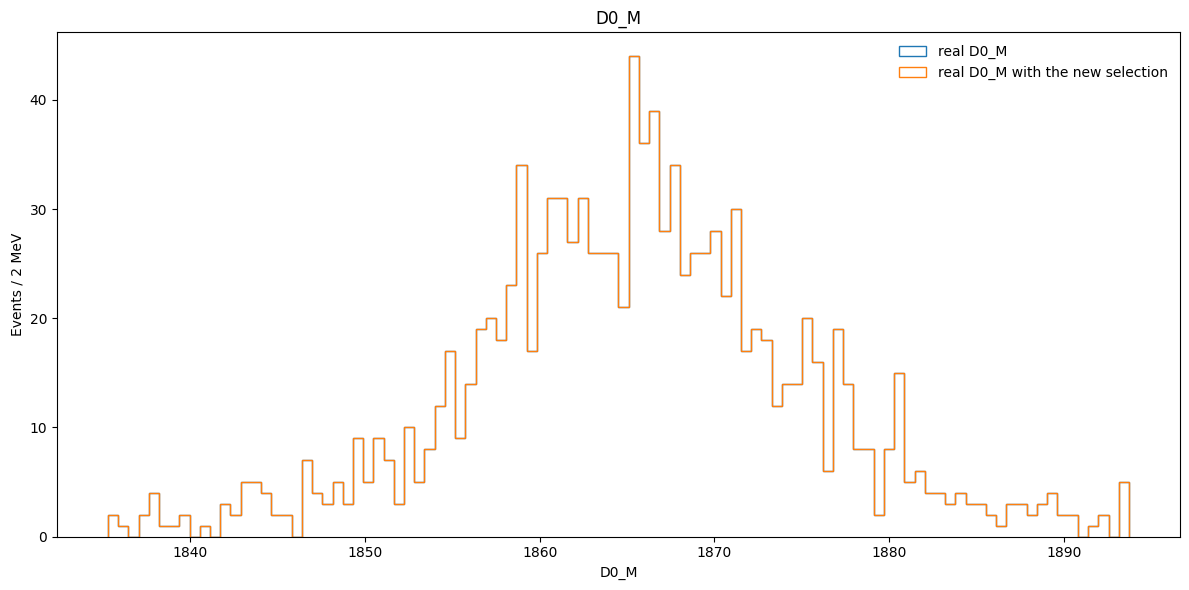

In [23]:
#NEW SELECTION PERFORMANCE
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(real_data['D0_M'], bins=100, histtype='step', label='real D0_M')
ax.hist(real_data.query(NEW_SELECTION)['D0_M'], bins=100, histtype='step', label='real D0_M with the new selection')
# ax.hist(real_data.query(THE_BIG_SELECTION_original)['D0_M'], range = (6250,6300), bins=100, histtype='step', label='real D0_M with the old selection')
ax.set_xlabel('D0_M')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('D0_M')
ax.legend(frameon=False)


plt.tight_layout()
plt.show()

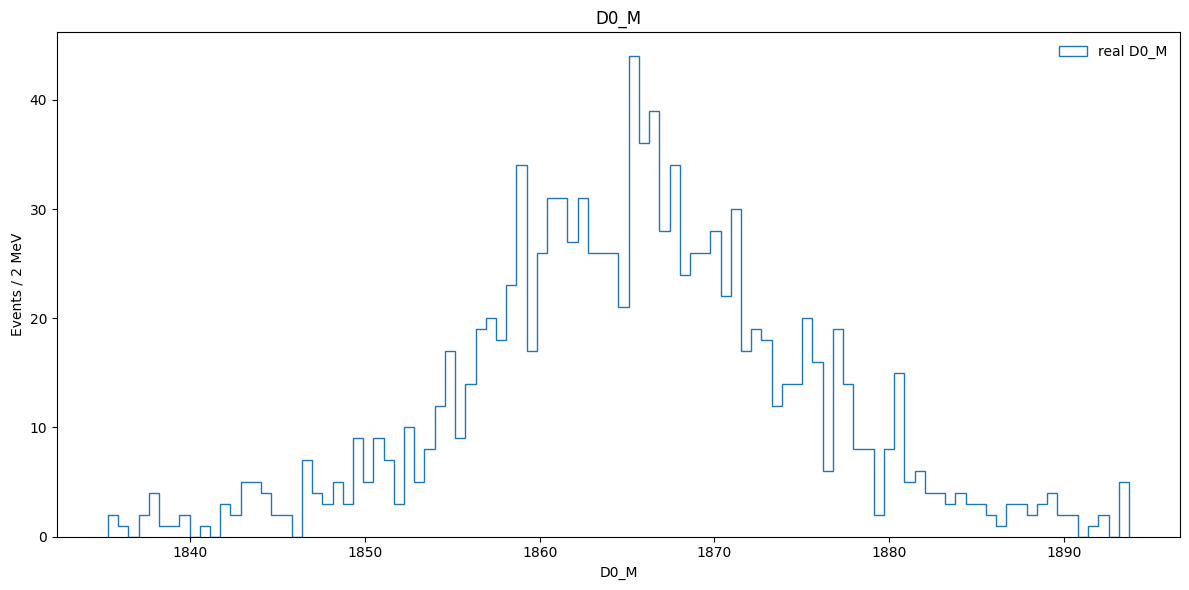

In [21]:
#NEW SELECTION PERFORMANCE
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(real_data['D0_M'], bins=100, histtype='step', label='real D0_M')
# ax.hist(real_data.query(NEW_SELECTION)['D0_M'], bins=100, histtype='step', label='real D0_M with the new selection')
# ax.hist(real_data.query(THE_BIG_SELECTION_original)['D0_M'], range = (6250,6300), bins=100, histtype='step', label='real D0_M with the old selection')
ax.set_xlabel('D0_M')
ax.set_ylabel('Events / 2 MeV')
ax.set_title('D0_M')
ax.legend(frameon=False)


plt.tight_layout()
plt.show()